# Data Understanding

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
df_incidents = pd.read_csv('data/incidents.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18728\2522561199.py:1: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_incidents = pd.read_csv('data/incidents.csv')


In [4]:
# Find the columns with mixed types
column_names = df_incidents.columns[[15, 16, 17]].tolist()
print(column_names)


['n_participants_child', 'n_participants_teen', 'n_participants_adult']


In [5]:
#Different types present in those columns
column_names = df_incidents.columns[[15, 16, 17]].tolist()

for col in column_names:
    unique_types = df_incidents[col].apply(type).unique()
    print(f"Data types in column '{col}': {unique_types}")


Data types in column 'n_participants_child': [<class 'float'> <class 'str'>]
Data types in column 'n_participants_teen': [<class 'float'> <class 'str'>]
Data types in column 'n_participants_adult': [<class 'float'> <class 'str'>]


In [6]:
#Convert those columns to float as they are supposed to be
column_names = df_incidents.columns[[15, 16, 17]].tolist()

for col in column_names:
    df_incidents[col] = pd.to_numeric(df_incidents[col], errors='coerce').astype('float64')

# To verify that the conversion was successful:
print(df_incidents[column_names].dtypes)

n_participants_child    float64
n_participants_teen     float64
n_participants_adult    float64
dtype: object


In [7]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

In [8]:
df_incidents.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,197568.000000,197571.000000,197572.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,16.122004,8.461910,18.516014,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,3294.717771,2223.925791,3232.716199,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,-977.000000,-947.000000,-991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,886365.000000,762487.000000,827900.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


In [9]:
print(df_incidents['state'].value_counts())

state
Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kans

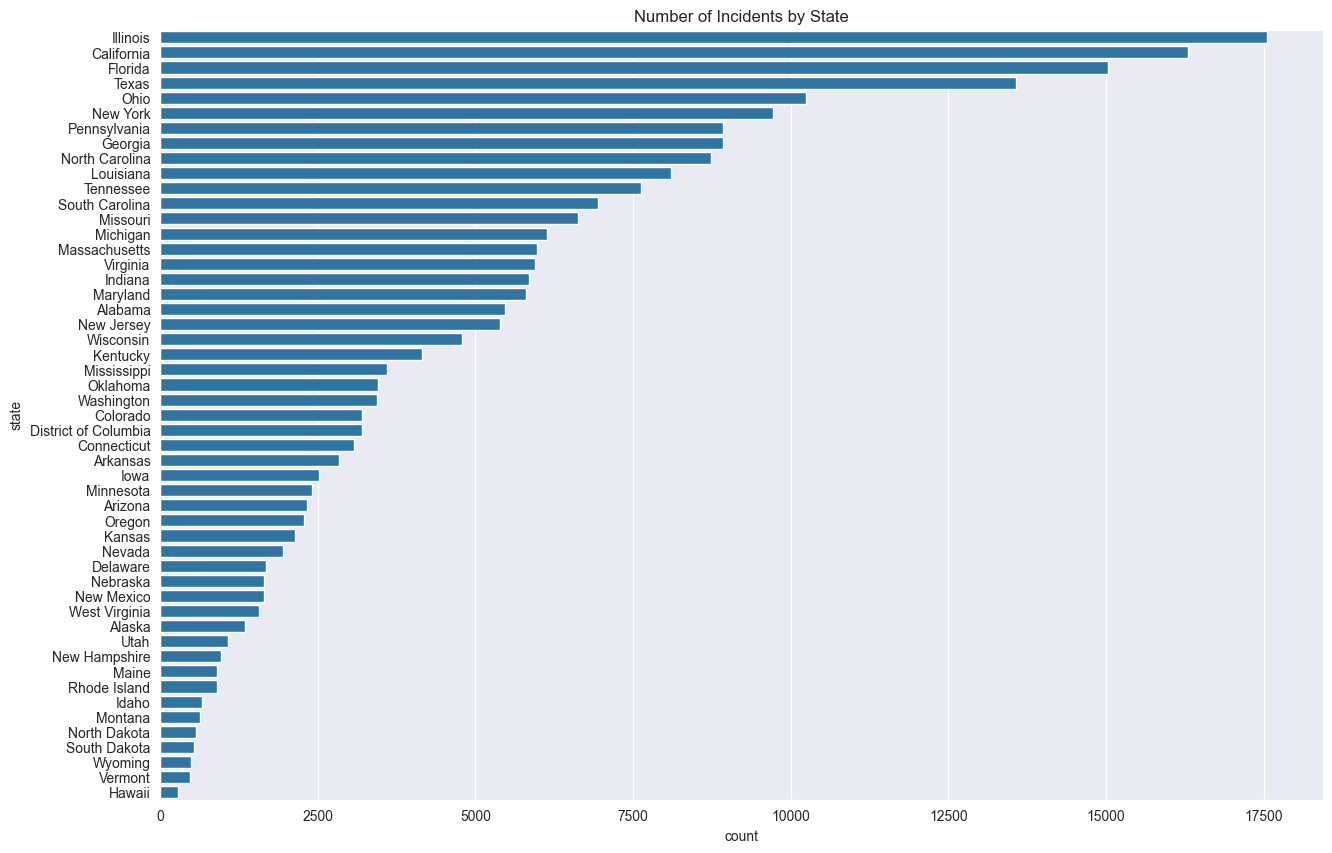

In [10]:
# Bar plot for the number of incidents by state:
# This will show which states have the highest number of incidents.
plt.figure(figsize=(15,10))
sn.countplot(data=df_incidents, y='state', order=df_incidents['state'].value_counts().index)
plt.title('Number of Incidents by State')
plt.show()

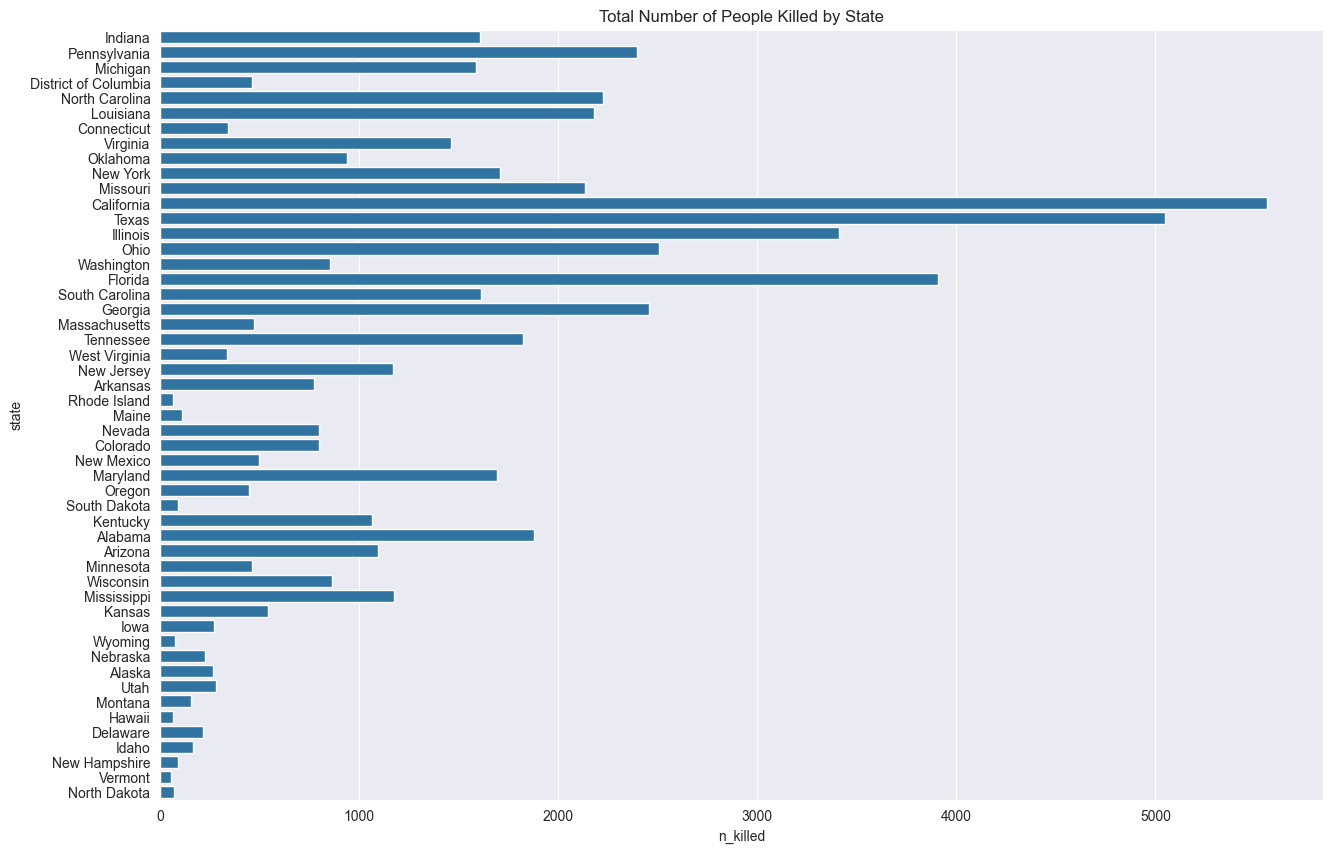

In [12]:
#Bar plot for number of people killed by state

plt.figure(figsize=(15,10))
sn.barplot(data=df_incidents, y='state', x='n_killed', estimator=sum, errorbar=None)
plt.title('Total Number of People Killed by State')
plt.show()


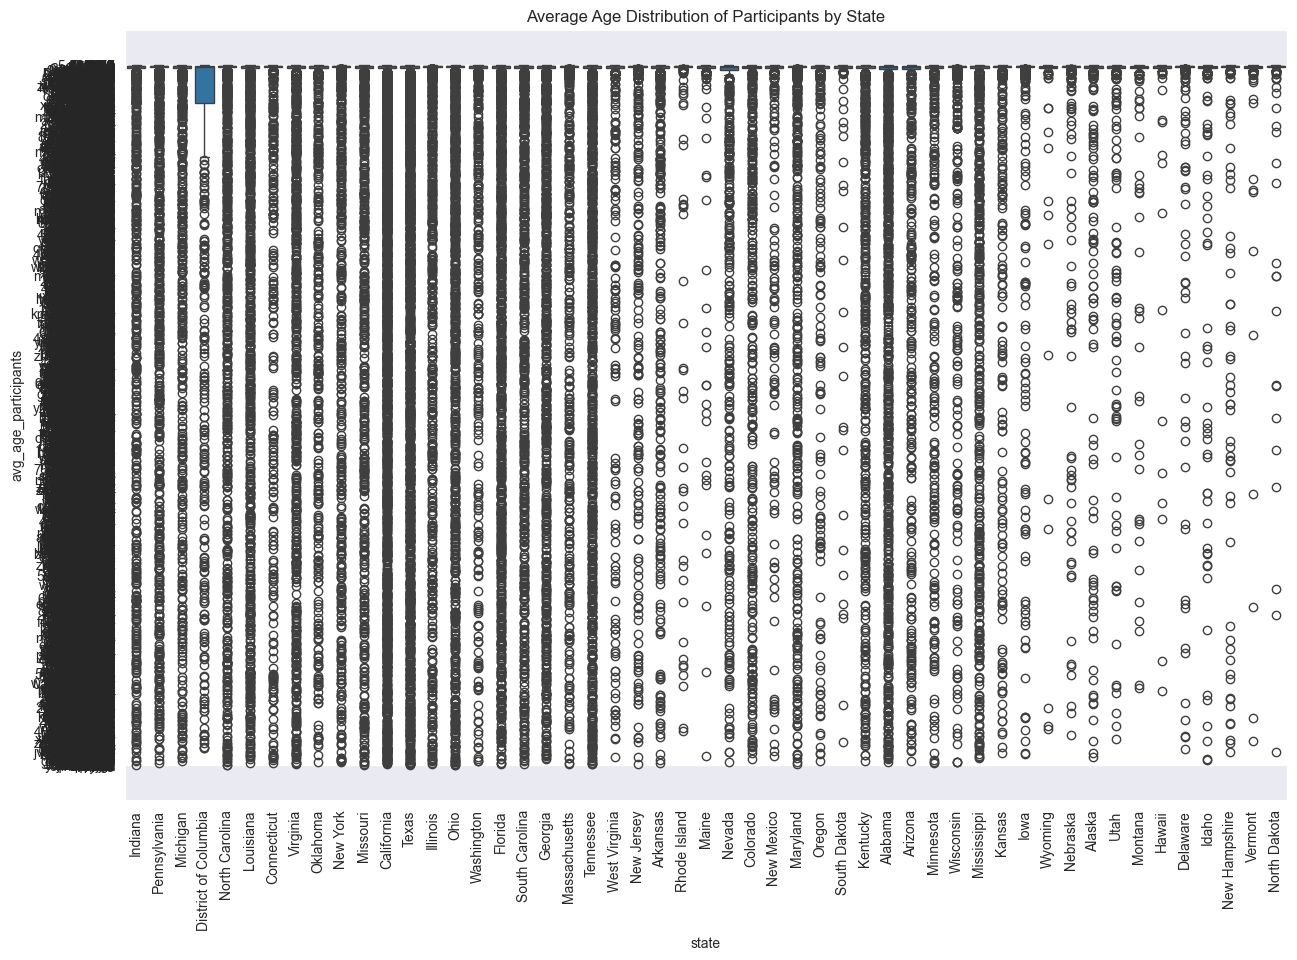

In [10]:
# Box plot for age distributions by state:
# This can give an idea about the age distribution of participants involved in incidents for each state.

plt.figure(figsize=(15,10))
sn.boxplot(data=df_incidents, x='state', y='avg_age_participants')
plt.xticks(rotation=90)
plt.title('Average Age Distribution of Participants by State')
plt.show()


In [15]:
# Checking for invalid states
valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia'
]

#Added District of Columbia to the valid states even though it not a real state but it is valid

df_incidents['is_valid_state'] = df_incidents['state'].isin(valid_states)
invalid_states = df_incidents[~df_incidents['is_valid_state']]
print(f"Number of records with invalid states: {len(invalid_states)}")

Number of records with invalid states: 0


In [16]:
# Check for gender consistency
invalid_genders = df_incidents[~df_incidents['participant_gender1'].isin(['Male', 'Female'])]
print(f"Invalid genders:\n{invalid_genders['participant_gender1'].unique()}")

Invalid genders:
[nan 'Male, female']


In [18]:
##Check for non-negative values for number fields
number_fields = ['n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants', '']
for field in number_fields:
    if df_incidents[df_incidents[field] < 0].shape[0] > 0:
        print(f"Negative values found in {field}")

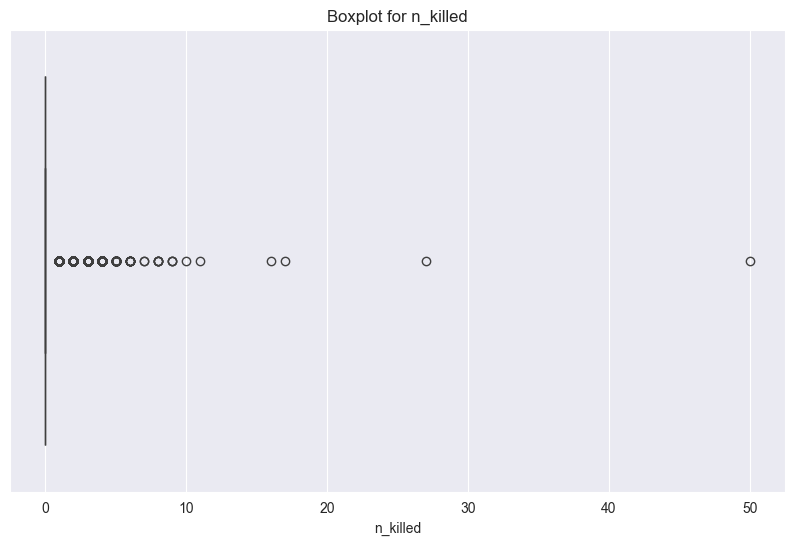

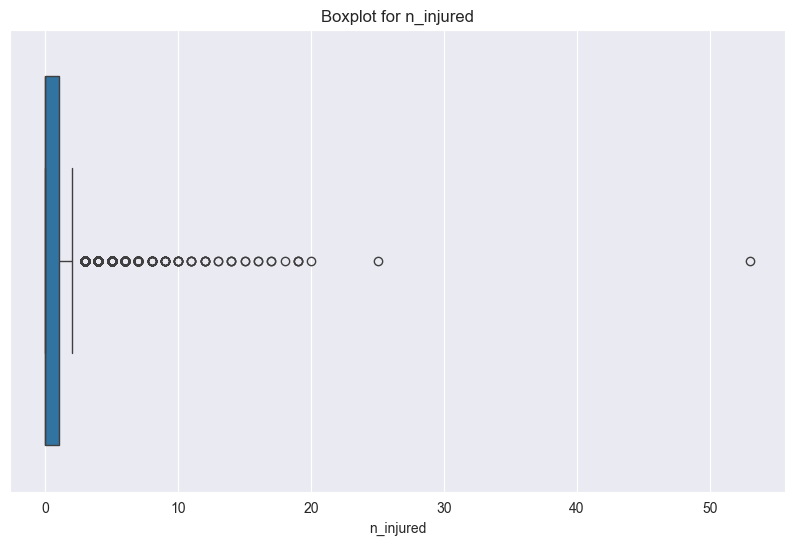

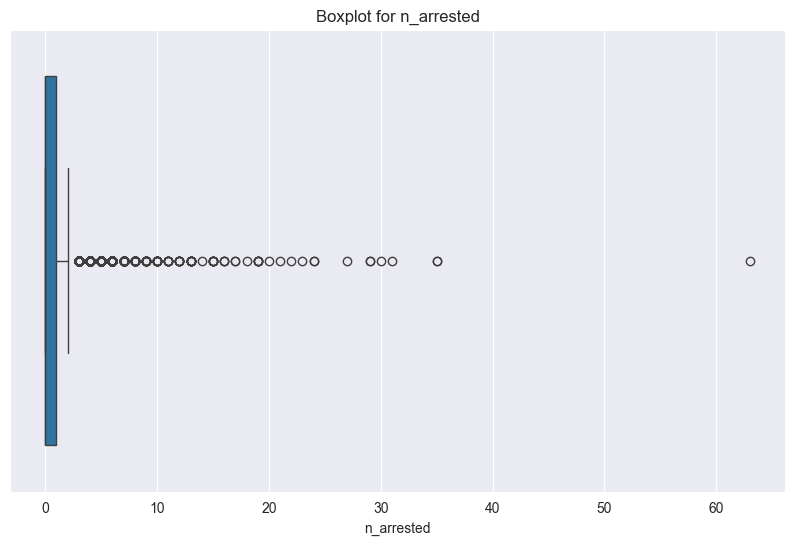

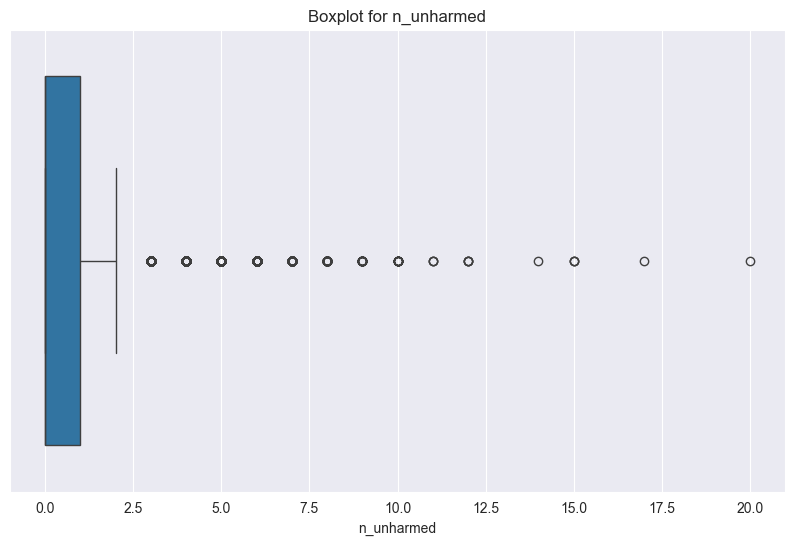

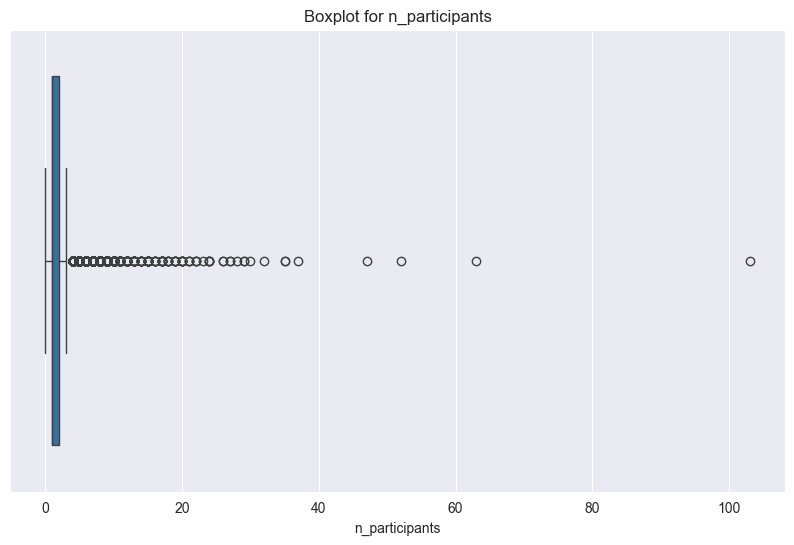

In [19]:
# 2. Find outliers
## a. Boxplots are a great way to visualize outliers
for field in number_fields:
    plt.figure(figsize=(10,6))
    sn.boxplot(x=df_incidents[field])
    plt.title(f"Boxplot for {field}")
    plt.show()

In [20]:
# 3. Detect and examine missing values & potential default values
## a. Check for missing values
missing_values = df_incidents.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
date                             0
state                            0
city_or_county                   0
address                      16497
latitude                      7923
longitude                     7923
congressional_district       11944
state_house_district         38772
state_senate_district        32335
participant_age1             92298
participant_age_group1       42119
participant_gender1          36362
min_age_participants         74798
avg_age_participants         74620
max_age_participants         74708
n_participants_child         42109
n_participants_teen          42106
n_participants_adult         42105
n_males                      36362
n_females                    36362
n_killed                         0
n_injured                        0
n_arrested                   27626
n_unharmed                   27626
n_participants                   0
notes                        81017
incident_characteristics1      326
incident_characteristics2    97746
is_v

In [21]:
## b. Check for default or placeholder values (e.g. 9999 or -1)
for field in number_fields:
    suspicious_values = df_incidents[df_incidents[field] == 9999].shape[0] # replace 9999 with any suspicious value
    if suspicious_values:
        print(f"Suspicious values found in {field}")

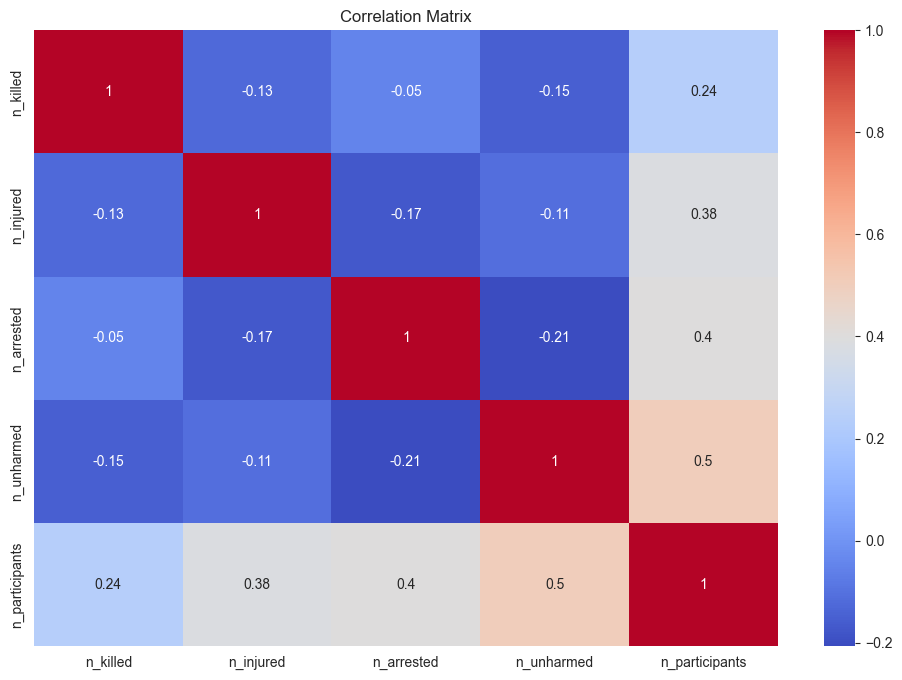

In [22]:
# 4. Discover new or confirm expected dependencies or correlations between attributes
correlation_matrix = df_incidents[number_fields].corr()
plt.figure(figsize=(12,8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

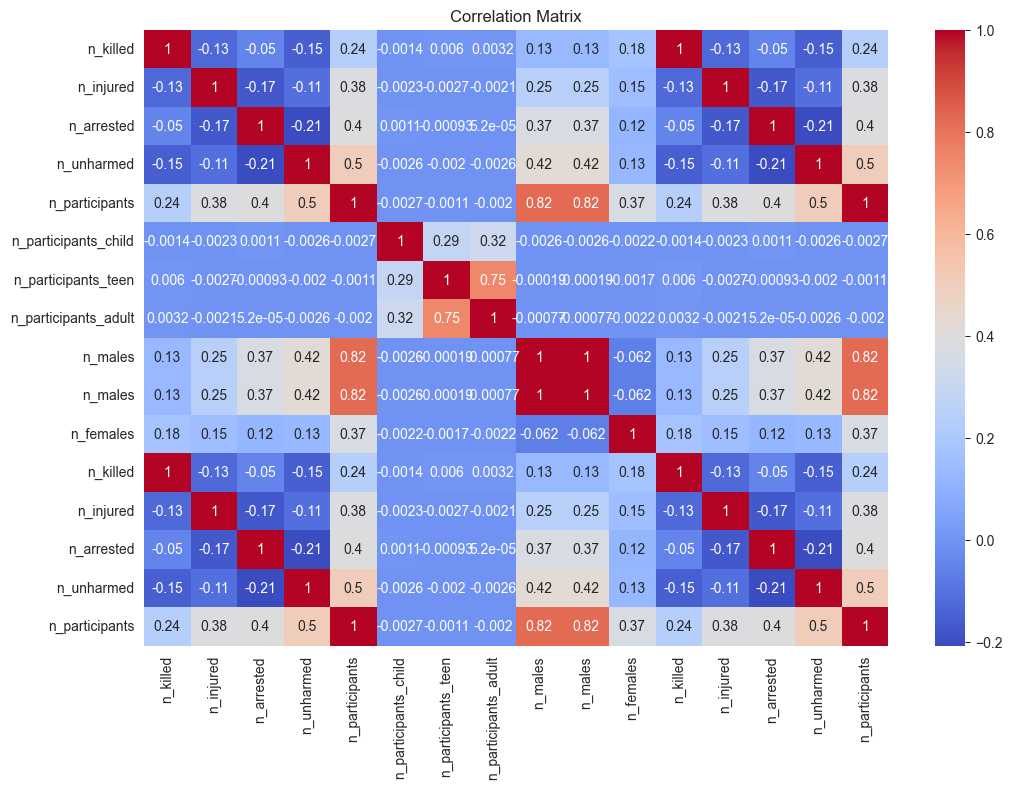

In [23]:
number_fields = ['n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants']

correlation_matrix = df_incidents[number_fields].corr()
plt.figure(figsize=(12,8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Figure size 1000x600 with 0 Axes>

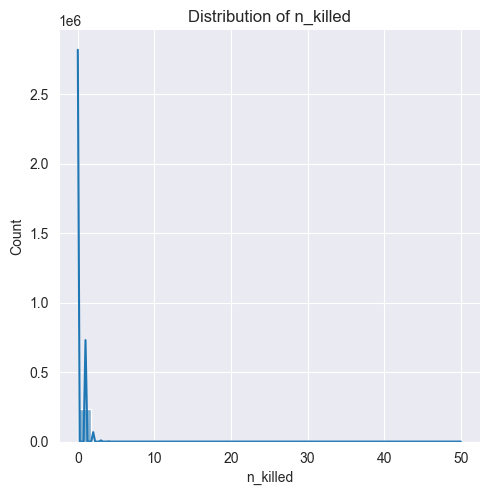

<Figure size 1000x600 with 0 Axes>

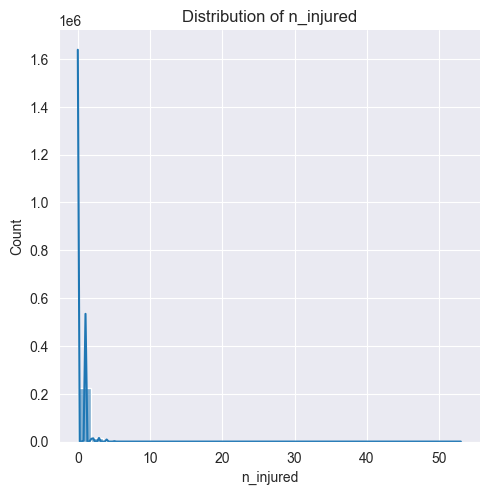

<Figure size 1000x600 with 0 Axes>

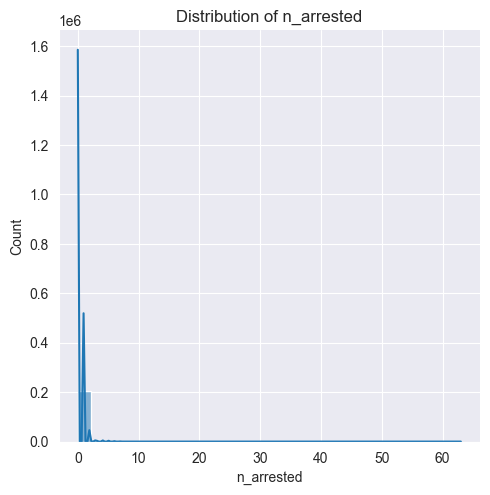

<Figure size 1000x600 with 0 Axes>

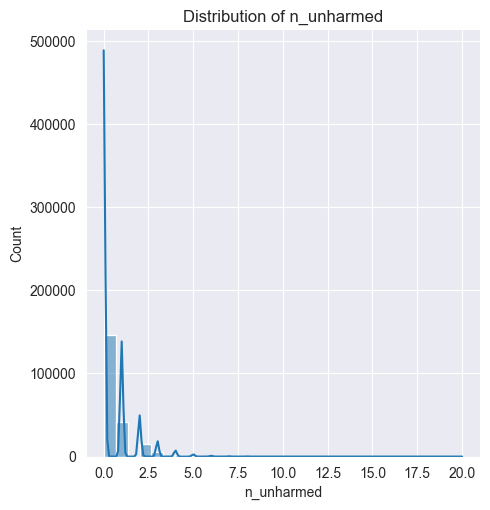

<Figure size 1000x600 with 0 Axes>

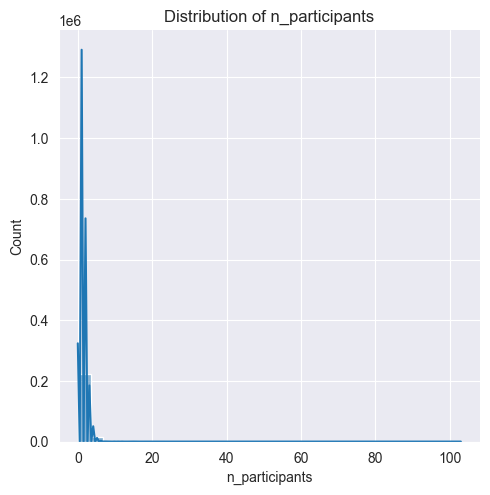

<Figure size 1000x600 with 0 Axes>

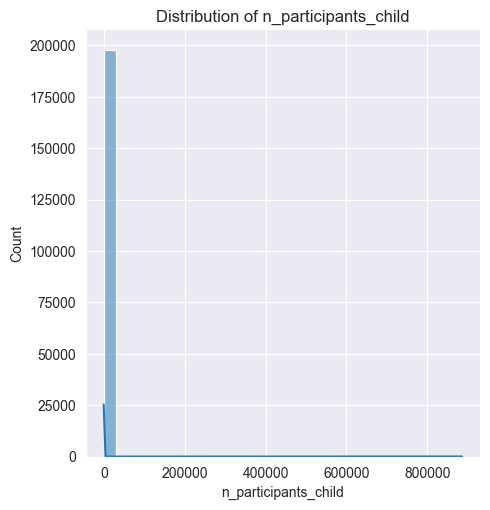

<Figure size 1000x600 with 0 Axes>

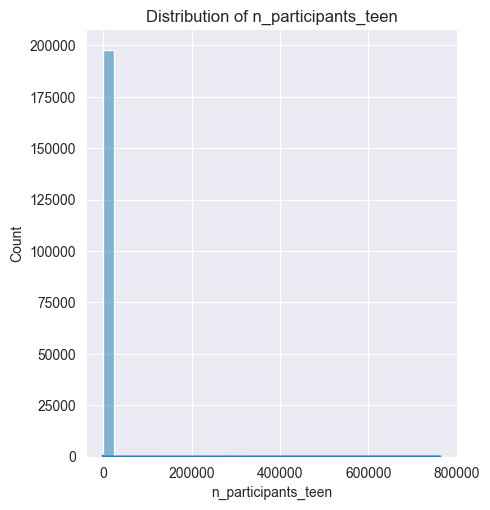

<Figure size 1000x600 with 0 Axes>

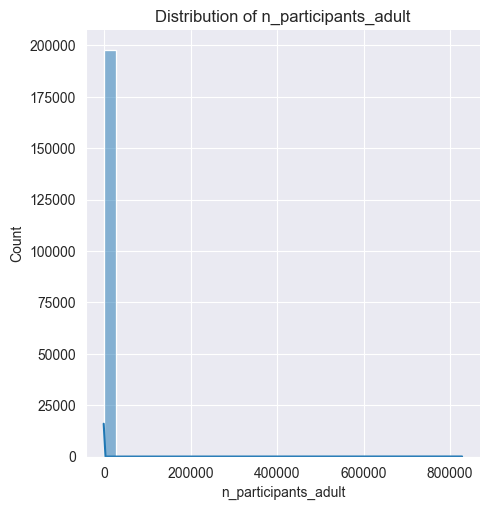

<Figure size 1000x600 with 0 Axes>

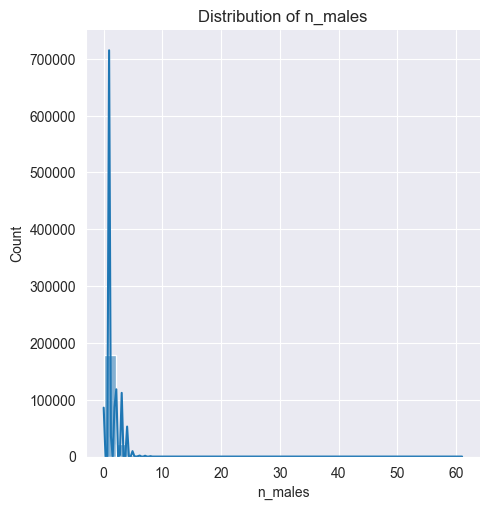

<Figure size 1000x600 with 0 Axes>

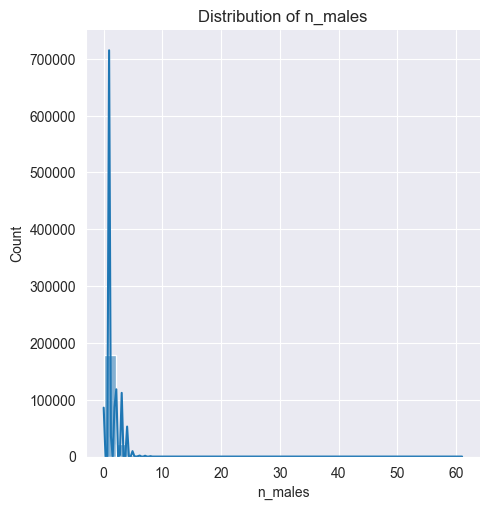

<Figure size 1000x600 with 0 Axes>

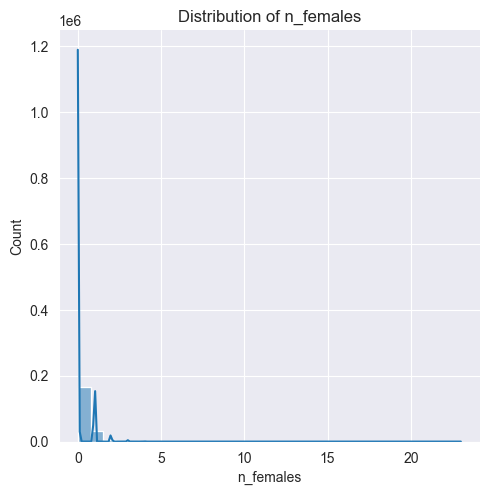

<Figure size 1000x600 with 0 Axes>

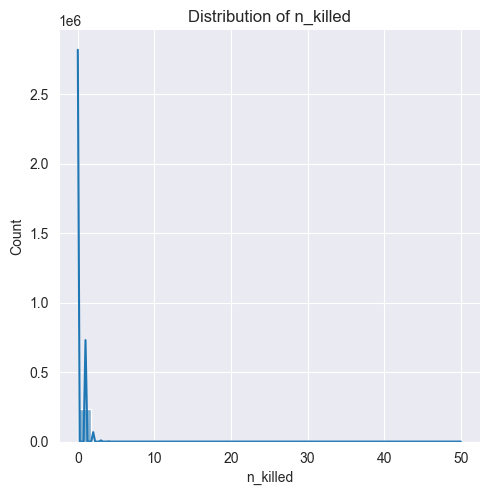

<Figure size 1000x600 with 0 Axes>

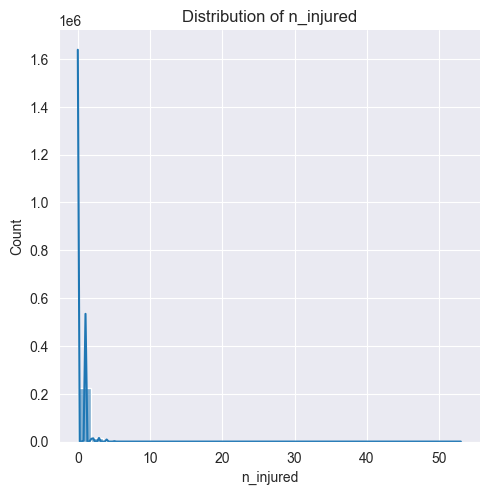

<Figure size 1000x600 with 0 Axes>

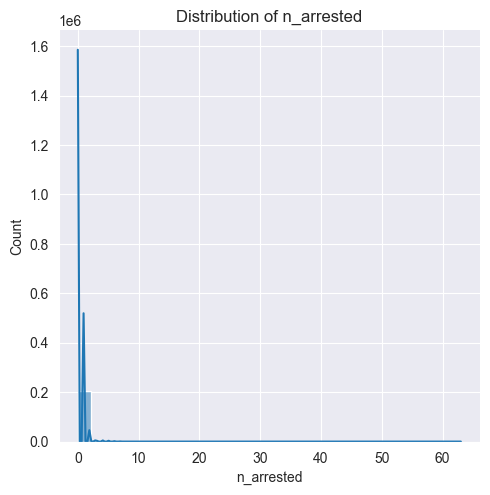

<Figure size 1000x600 with 0 Axes>

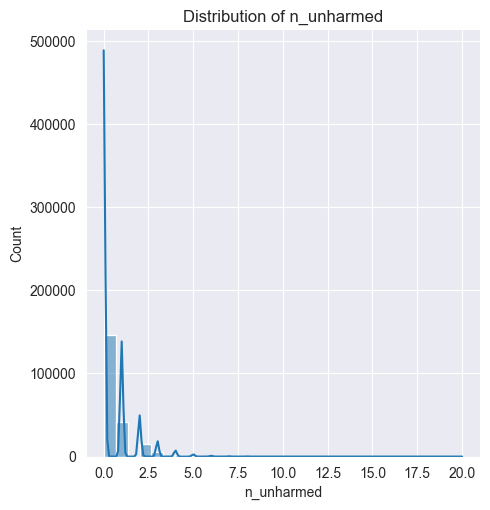

<Figure size 1000x600 with 0 Axes>

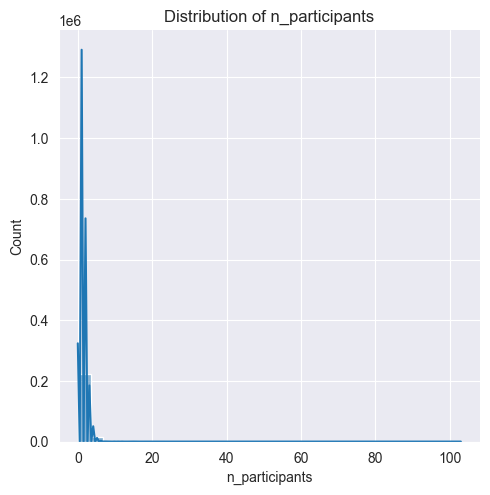

In [25]:
# 5. Check specific application dependent assumptions (like normal distribution)
## a. Check for normal distribution
for field in number_fields:
    plt.figure(figsize=(10,6))
    sn.displot(df_incidents[field].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {field}")
    plt.show()

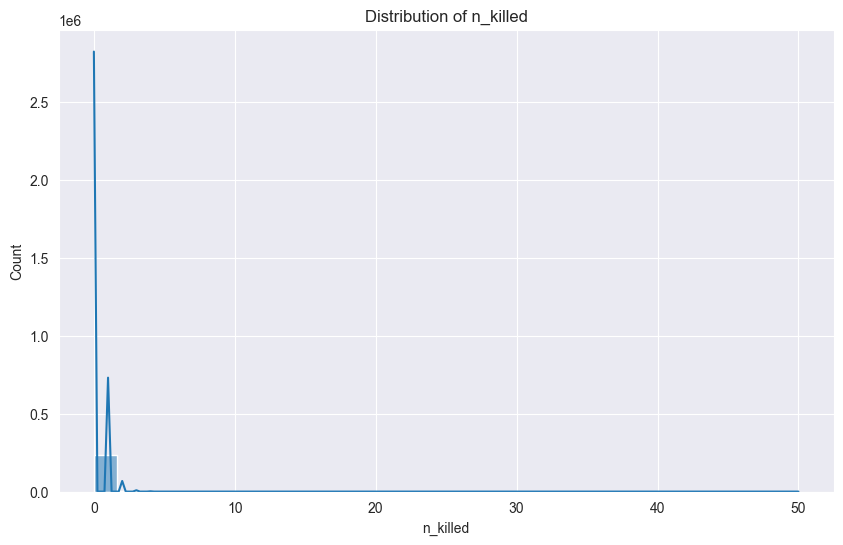

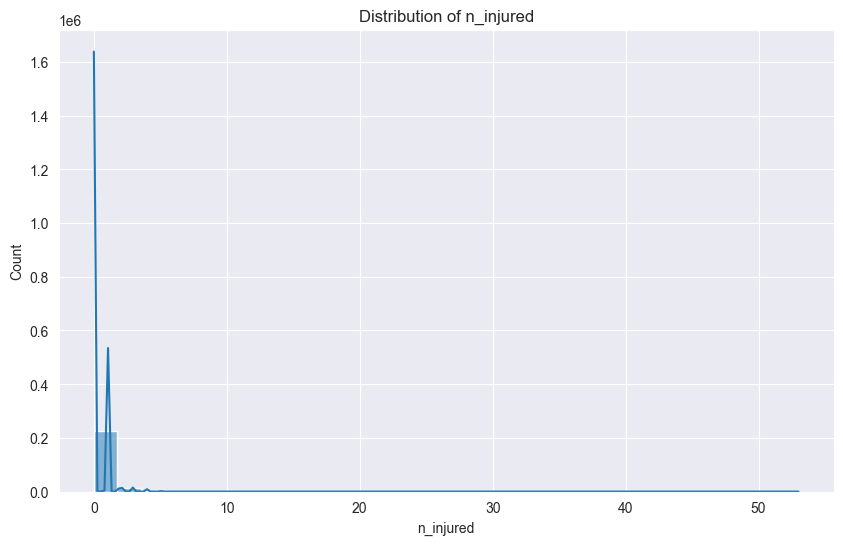

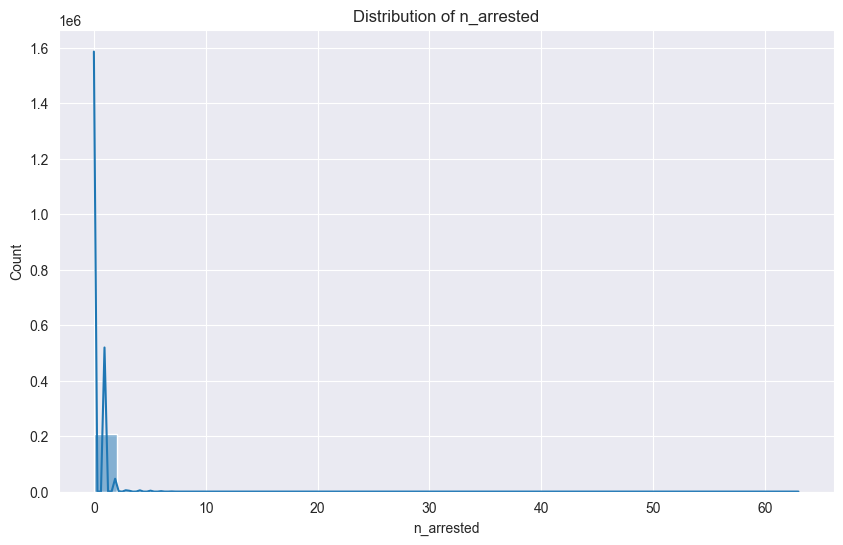

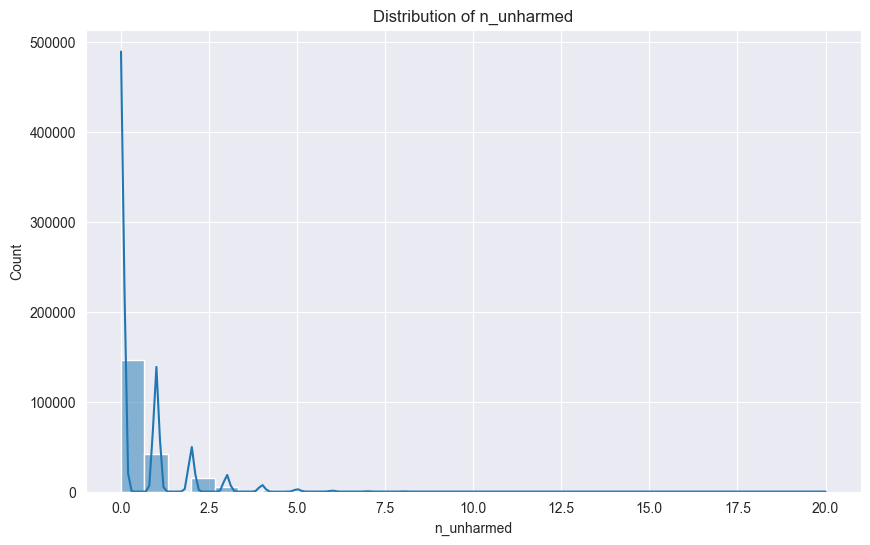

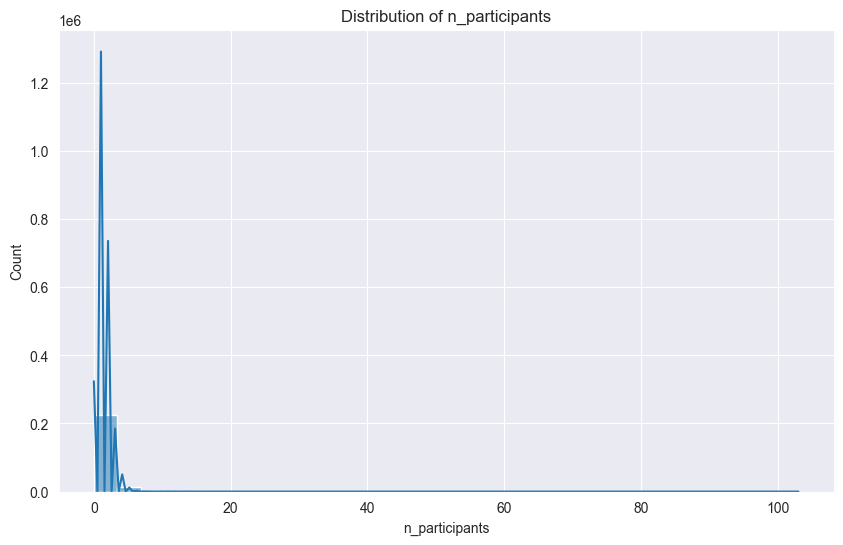

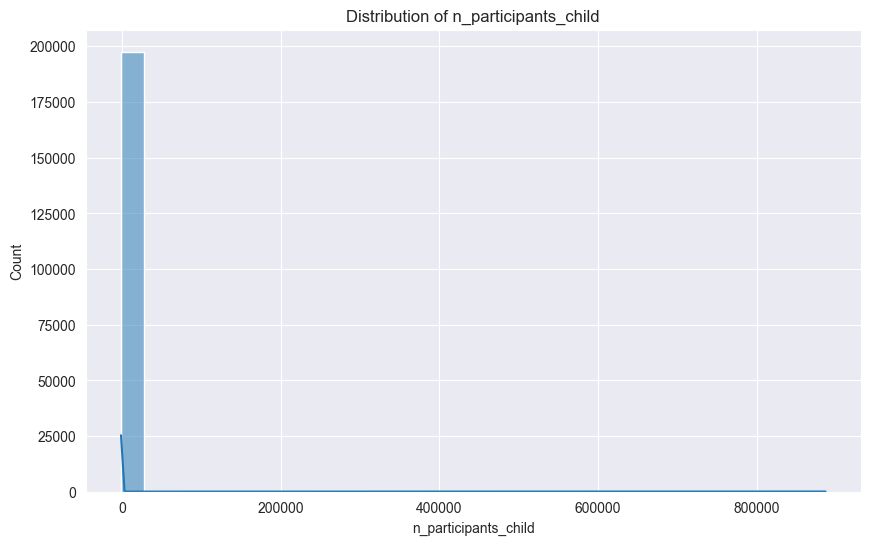

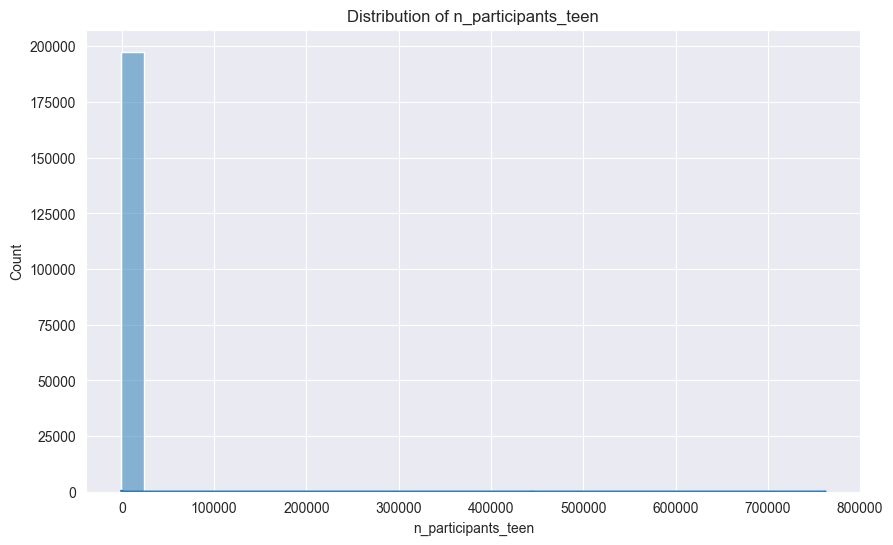

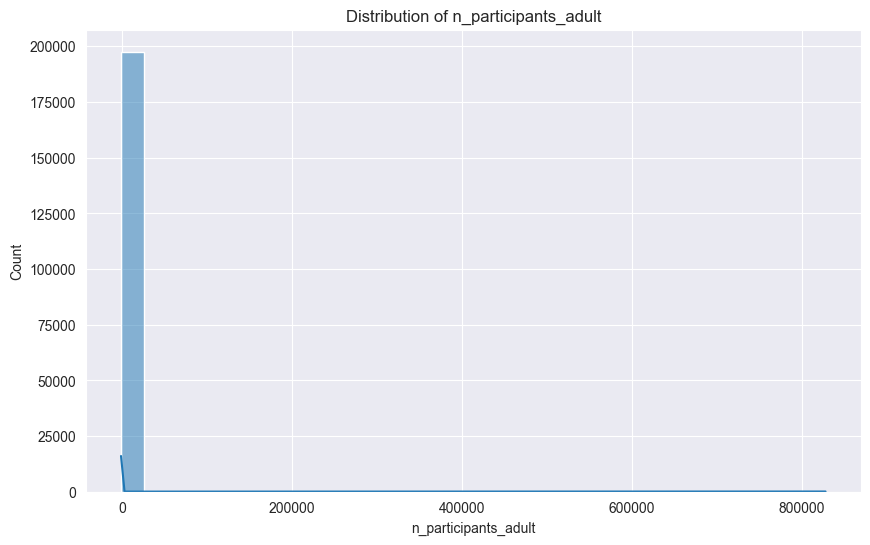

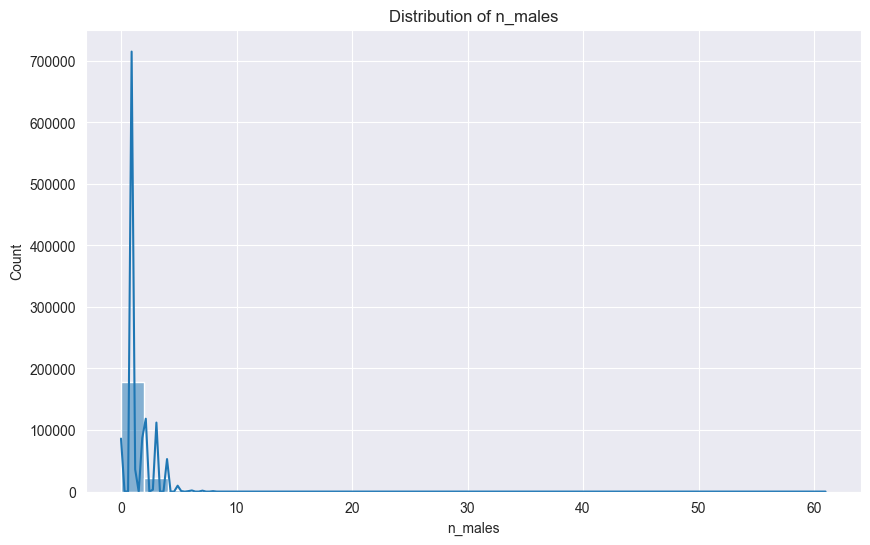

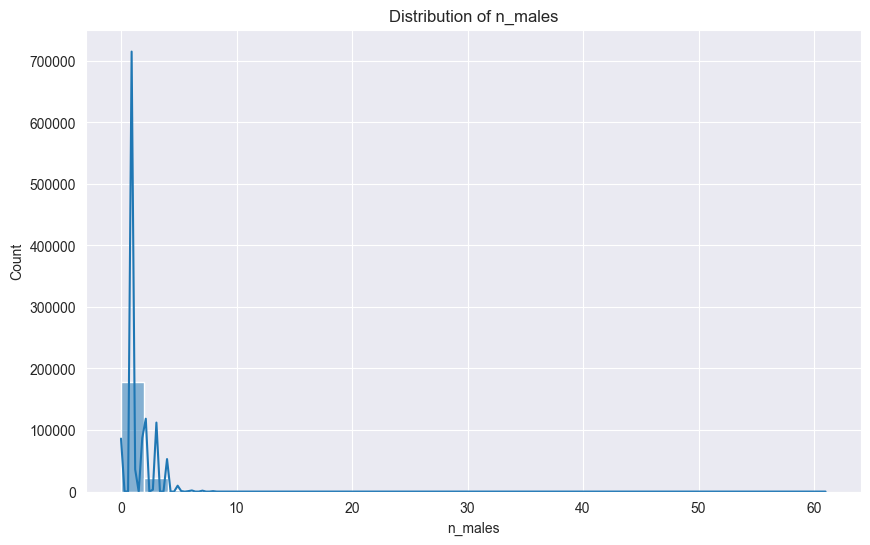

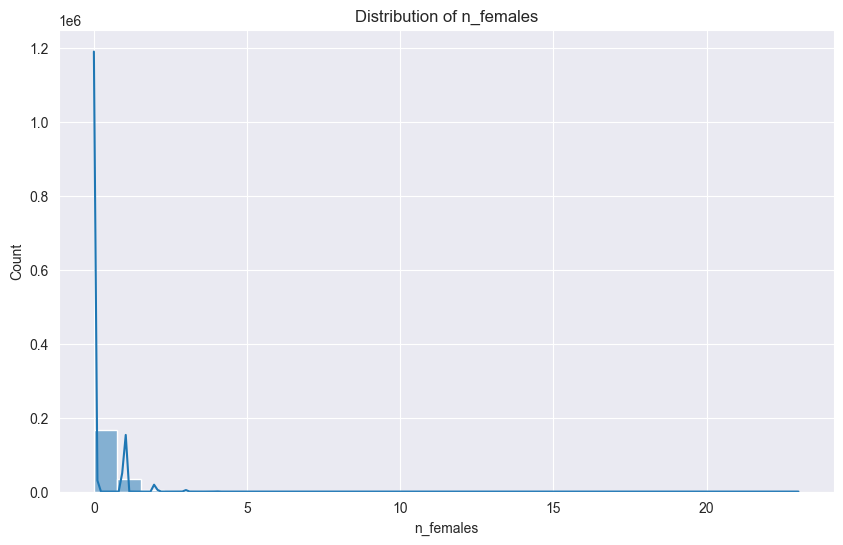

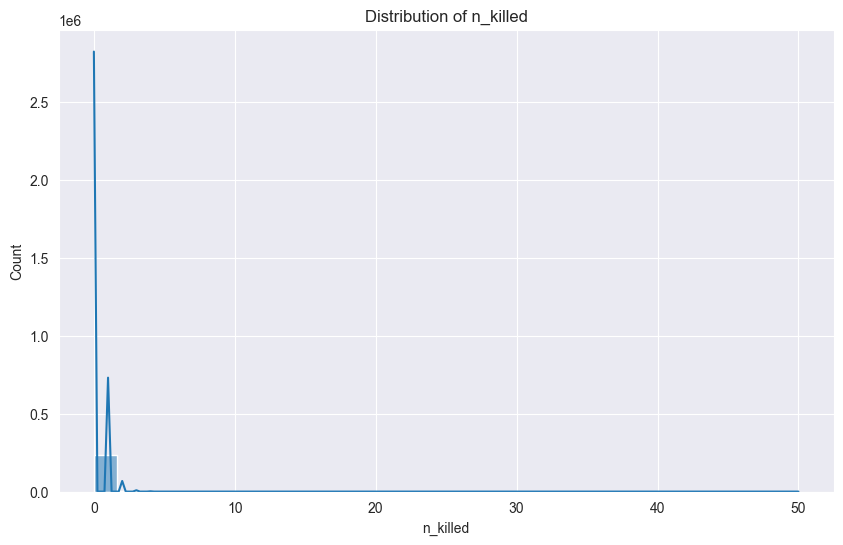

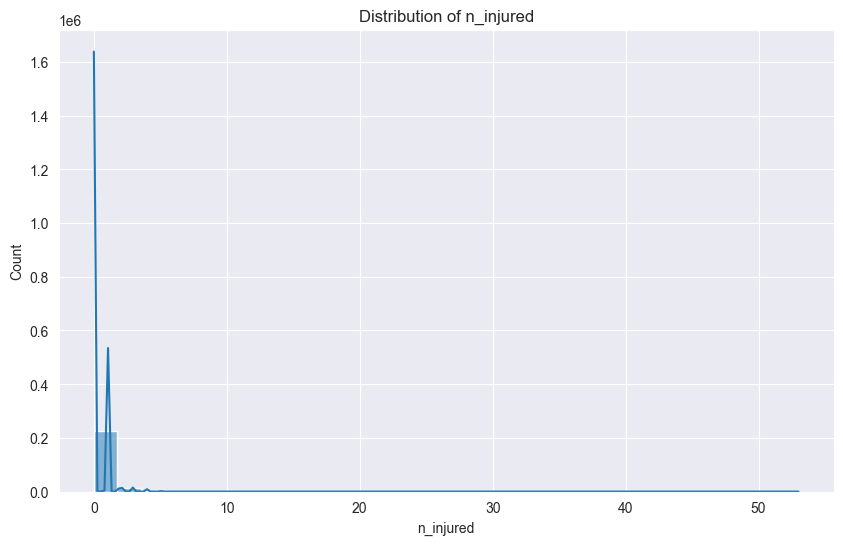

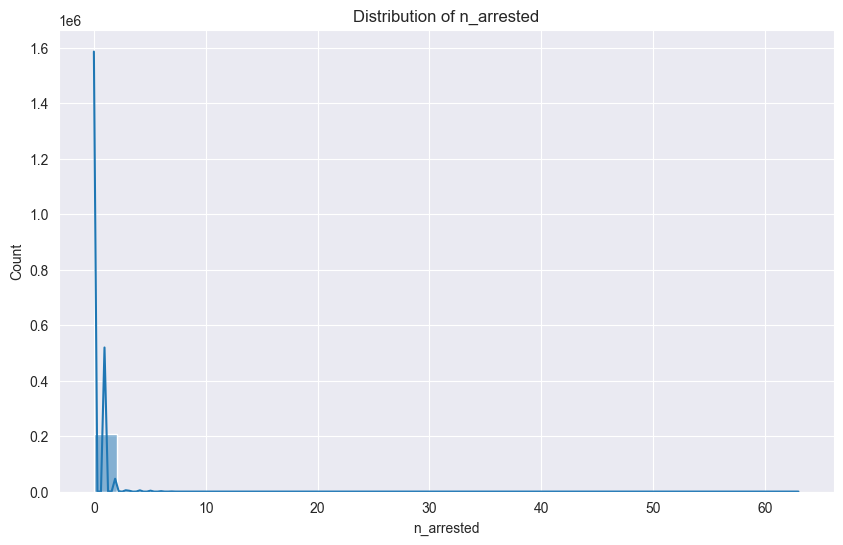

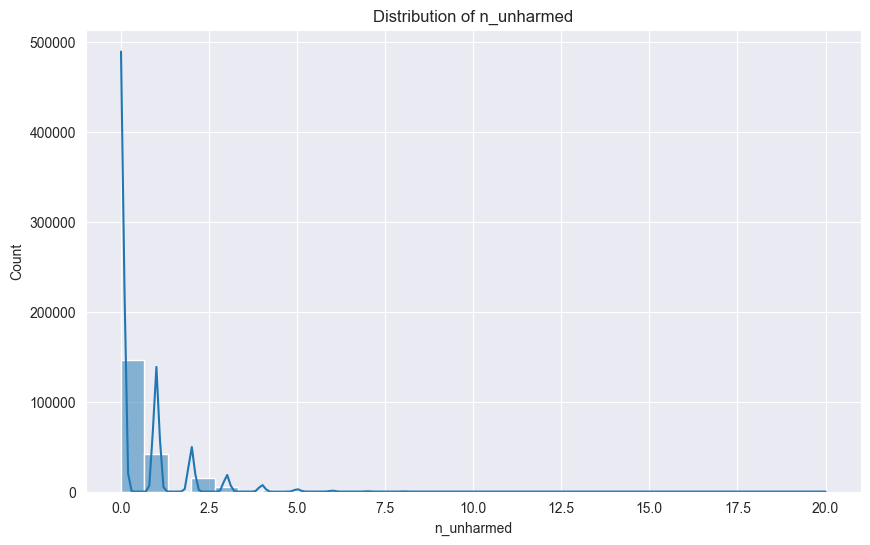

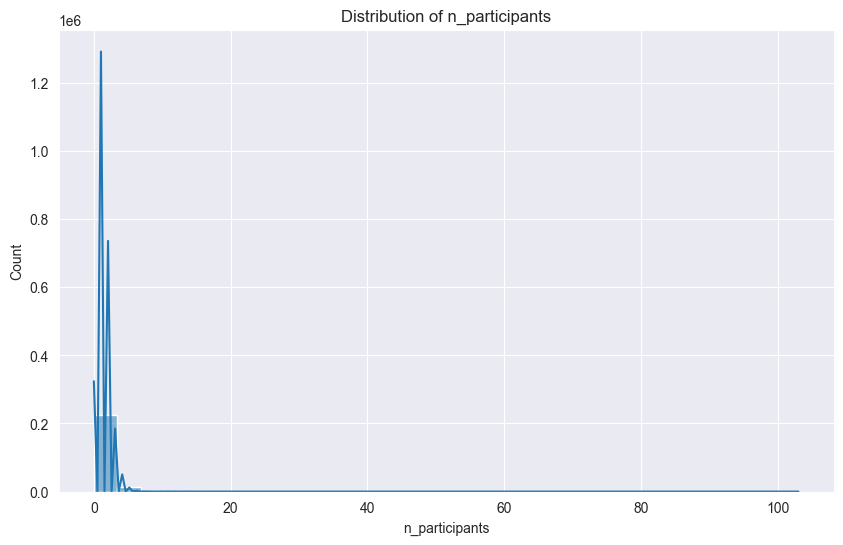

In [26]:
for field in number_fields:
    plt.figure(figsize=(10,6))
    sn.histplot(df_incidents[field].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {field}")
    plt.show()

In [30]:
actual_mean_n_killed = df_incidents['n_killed'].mean()
print(f"Mean number killed({actual_mean_n_killed})")

Mean number killed(0.25228953967214207)


In [29]:
# 6. Compare statistics with expected behavior
## For this part, you need to have a priori expectations. For demonstration:
expected_mean_n_killed = 2  # This is just an example value
actual_mean_n_killed = df_incidents['n_killed'].mean()
print(f"Mean number killed({actual_mean_n_killed})")
if actual_mean_n_killed > expected_mean_n_killed:
    print(f"Actual mean of n_killed ({actual_mean_n_killed}) is greater than expected ({expected_mean_n_killed})")

Mean number killed(0.25228953967214207)


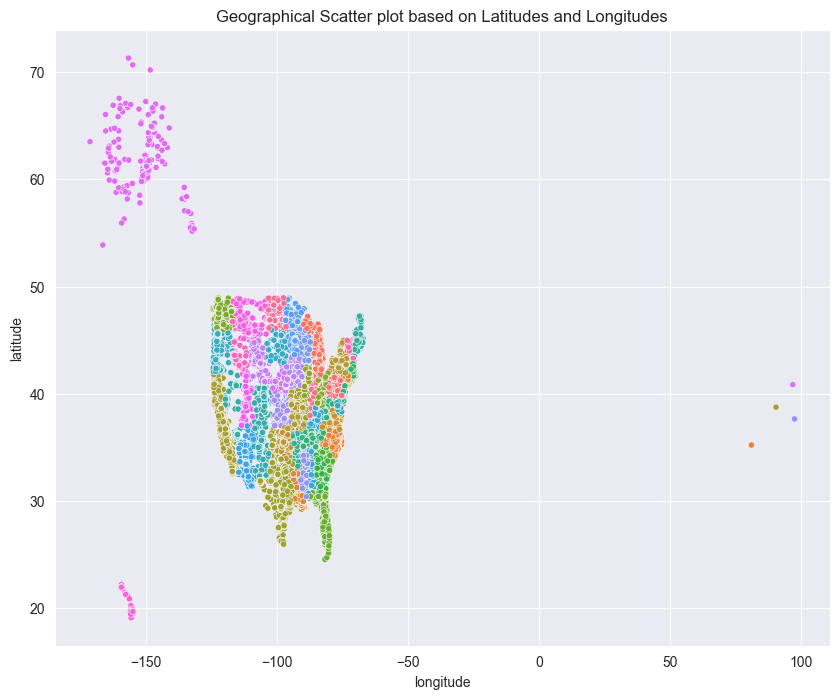

In [33]:
# Addressing the latitude and longitude attributes to visualize data geographically
plt.figure(figsize=(10, 8))
sn.scatterplot(x=df_incidents['longitude'], y=df_incidents['latitude'], hue=df_incidents['state'], legend=False, s=20)
plt.title("Geographical Scatter plot based on Latitudes and Longitudes")
plt.show()